In [19]:
# ================================================
# OBJECTIVE 4 – : Interpreting Query Results through Data Visualization
# ================================================

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

# -------- 1) Upload CSV files ----------
print(" Please upload your 4 CSV files now.")
uploaded = files.upload()

print("\n Files in this session:")
print(os.listdir())

detox_file      = "Data_Detox_Sleep.csv"
screen_file     = "Data_ScreenTime_Stress.csv"
platform_file   = "Data_Platform_Stress.csv"
exercise_file   = "Data_Exercise_Happiness.csv"

detox_sleep    = pd.read_csv(detox_file)
screen_stress  = pd.read_csv(screen_file)
platform_stress = pd.read_csv(platform_file, encoding="latin1", engine="python")
exercise_happy = pd.read_csv(exercise_file)

print("\n Loaded shapes:")
print("detox_sleep:", detox_sleep.shape)
print("screen_stress:", screen_stress.shape)
print("platform_stress:", platform_stress.shape)
print("exercise_happy:", exercise_happy.shape)

 Please upload your 4 CSV files now.


Saving Data_Detox_Sleep.csv to Data_Detox_Sleep (5).csv
Saving Data_Exercise_Happiness.csv to Data_Exercise_Happiness (5).csv
Saving Data_Platform_Stress.csv to Data_Platform_Stress (7).csv
Saving Data_ScreenTime_Stress.csv to Data_ScreenTime_Stress (7).csv

 Files in this session:
['.config', 'Data_ScreenTime_Stress.csv', 'Comparison_Platform_Stress_FINAL.png', 'ScreenTime_Category_Stress_FINAL.png', 'Data_ScreenTime_Stress (6).csv', 'Data_Exercise_Happiness (1).csv', 'Data_Platform_Stress (4).csv', 'Data_Platform_Stress (2).csv', 'Data_ScreenTime_Stress (1).csv', 'Data_Platform_Stress (7).csv', 'Data_ScreenTime_Stress (4).csv', 'Data_ScreenTime_Stress (7).csv', 'Data_Detox_Sleep (4).csv', 'Data_Platform_Stress (5).csv', 'Data_Exercise_Happiness (5).csv', 'Data_Exercise_Happiness.csv', 'Data_ScreenTime_Stress (5).csv', 'Data_Platform_Stress (6).csv', 'Data_Exercise_Happiness (2).csv', 'Data_ScreenTime_Stress (2).csv', 'Data_Detox_Sleep.csv', 'Data_Exercise_Happiness (4).csv', 'Data_Pl

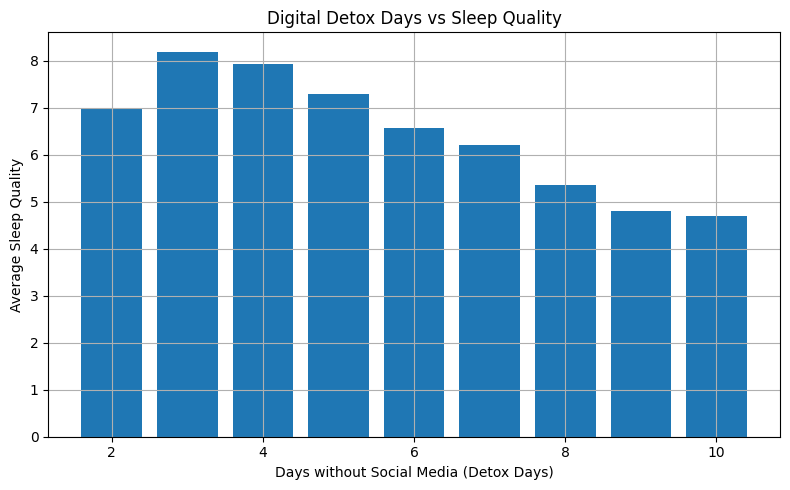

In [20]:
# ======================================================
# PLOT 1 — Detox Days vs Sleep Quality
# ======================================================

plt.figure()
plt.bar(detox_sleep.iloc[:, 0], detox_sleep.iloc[:, 1])
plt.xlabel("Days without Social Media (Detox Days)")
plt.ylabel("Average Sleep Quality")
plt.title("Digital Detox Days vs Sleep Quality")
plt.tight_layout()
plt.show()

screen_stress columns: ['Usage_Category', 'Avg_Stress_Level']


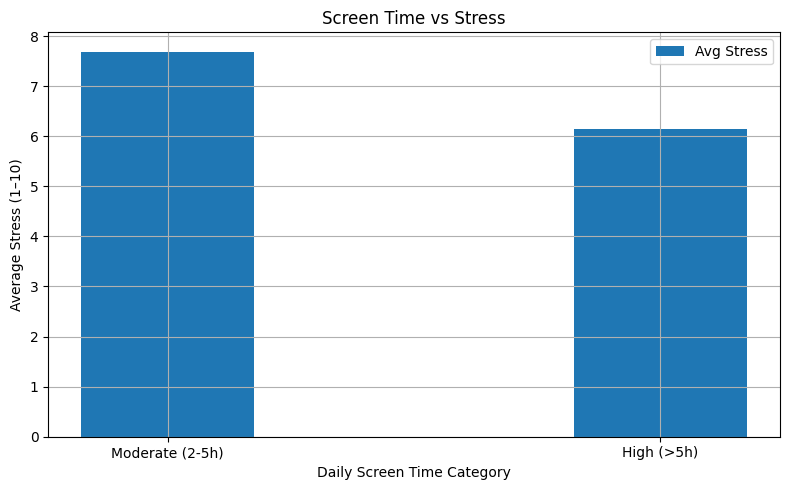

In [21]:
# ======================================================
# PLOT 2 — Screen Time Category vs Stress (& Happiness if available)
# ======================================================

print("screen_stress columns:", screen_stress.columns.tolist())

# Case 1:
if screen_stress.shape[1] == 2:
    screen_stress.columns = ["Usage_Category", "Avg_Stress_Level"]
    has_happiness = False

# Case 2:
else:
    screen_stress = screen_stress.iloc[:, :3]  # first 3 cols
    screen_stress.columns = ["Usage_Category", "Avg_Stress_Level", "Avg_Happiness"]
    has_happiness = True

cat_order = ["Low (<2h)", "Moderate (2-5h)", "High (>5h)"]
screen_stress["Usage_Category"] = pd.Categorical(
    screen_stress["Usage_Category"], categories=cat_order, ordered=True
)
screen_stress = screen_stress.sort_values("Usage_Category")

x = range(len(screen_stress))
width = 0.35

plt.figure()

# Always plot stress
plt.bar(x, screen_stress["Avg_Stress_Level"], width=width, label="Avg Stress")

# Plot happiness only if it exists
if has_happiness:
    plt.bar(
        [i + width for i in x],
        screen_stress["Avg_Happiness"],
        width=width,
        label="Avg Happiness"
    )
    plt.ylabel("Average Score (1–10)")
    title = "Screen Time vs Stress & Happiness"
else:
    plt.ylabel("Average Stress (1–10)")
    title = "Screen Time vs Stress"

plt.xticks(x, screen_stress["Usage_Category"])
plt.xlabel("Daily Screen Time Category")
plt.title(title)
plt.legend()
plt.tight_layout()
plt.show()


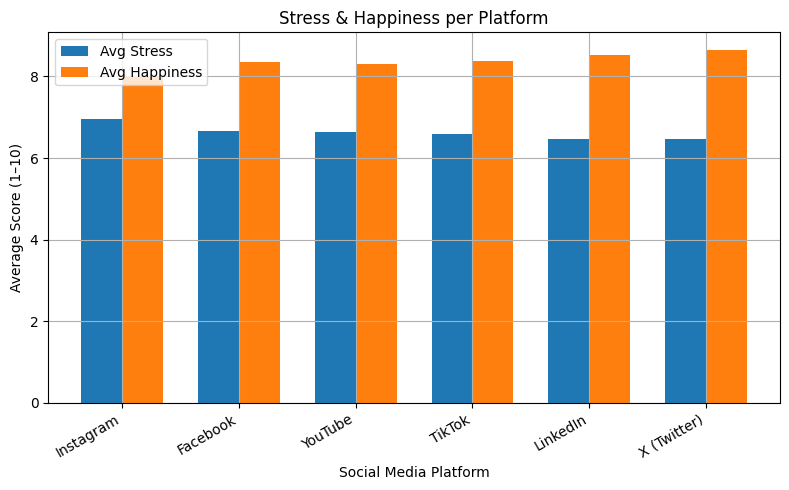

In [22]:
# ======================================================
# PLOT 3 — Platform vs Stress & Happiness
# ======================================================

platform_stress.columns = ["social_media_platform", "avg_stress", "avg_happiness"]

platform_sorted = platform_stress.sort_values("avg_stress", ascending=False)
x = range(len(platform_sorted))
width = 0.35

plt.figure()
plt.bar([i - width/2 for i in x], platform_sorted["avg_stress"], width=width, label="Avg Stress")
plt.bar([i + width/2 for i in x], platform_sorted["avg_happiness"], width=width, label="Avg Happiness")

plt.xticks(x, platform_sorted["social_media_platform"], rotation=30, ha="right")
plt.xlabel("Social Media Platform")
plt.ylabel("Average Score (1–10)")
plt.title("Stress & Happiness per Platform")
plt.legend()
plt.tight_layout()
plt.show()

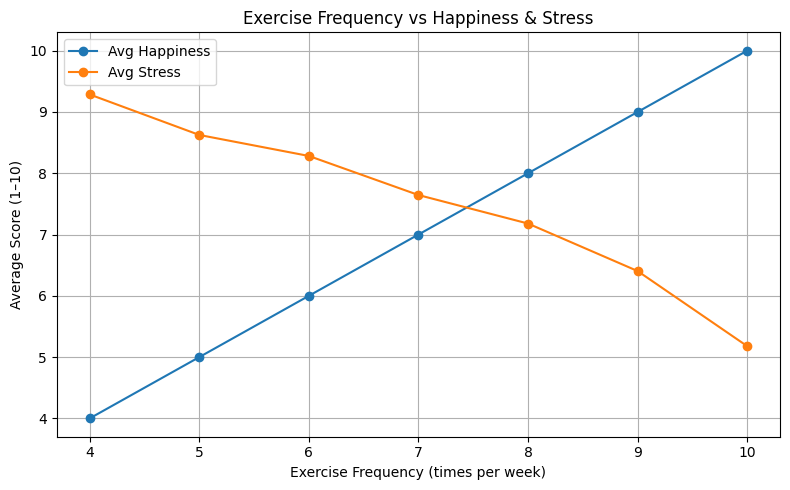

In [23]:
# ======================================================
# PLOT 4 — Exercise Frequency vs Happiness & Stress
# ======================================================

exercise_happy.columns = ["exercise_frequency", "avg_happiness", "avg_stress"]
exercise_sorted = exercise_happy.sort_values("exercise_frequency")

plt.figure()
plt.plot(exercise_sorted["exercise_frequency"], exercise_sorted["avg_happiness"], marker="o", label="Avg Happiness")
plt.plot(exercise_sorted["exercise_frequency"], exercise_sorted["avg_stress"],    marker="o", label="Avg Stress")

plt.xlabel("Exercise Frequency (times per week)")
plt.ylabel("Average Score (1–10)")
plt.title("Exercise Frequency vs Happiness & Stress")
plt.legend()
plt.tight_layout()
plt.show()
